This Whole Below if for Trainig Model , Make sure you import My training dataset from Roboflow.

Do remember this Training Process Needs little larger trainig time, Depending on your system specifications.

The link to dataset : https://universe.roboflow.com/shubhworkspace/foot123/model/1



In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102 🚀 Python-3.12.6 torch-2.4.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 45.6/228.3 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

In [ ]:
model = YOLO(f'yolov8l.pt')
results = model.predict(source="untrained-images/linesman-football.jpg", save=True, conf=0.79)


image 1/1 /Users/shubh_home/Desktop/Python-files/untrained-images/linesman-football.jpg: 448x640 2 persons, 1 kite, 347.1ms
Speed: 3.5ms preprocess, 347.1ms inference, 6.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


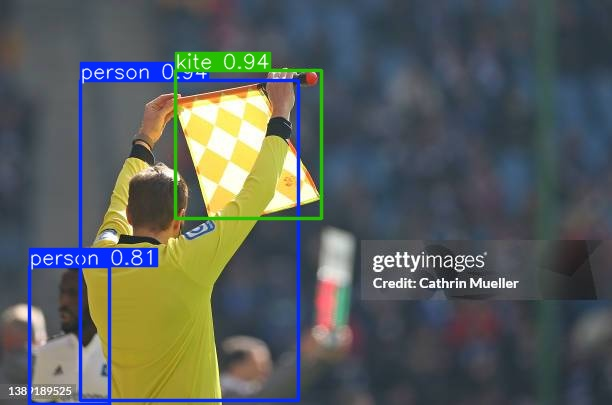

In [ ]:

Image(filename="runs/detect/predict2/linesman-football.jpg")

In [ ]:
results[0].boxes.xyxy

tensor([[175.2119,  70.1373, 321.9781, 218.9270],
        [ 80.8424,  80.9479, 298.4785, 400.6278],
        [ 29.8035, 266.8152, 109.6379, 404.3607]])

In [ ]:
results[0].boxes.conf

tensor([0.9355, 0.9354, 0.8105])

In [ ]:
results[0].boxes.cls

tensor([33.,  0.,  0.])

In [ ]:
from roboflow import Roboflow


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("shubhworkspace").project("foot123")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.102, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data="/Users/shubh_home/Desktop/Python-files/Foot123-1/data.yaml" epochs=32  imgsz=800 plots=True


New https://pypi.org/project/ultralytics/8.3.3 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.102 🚀 Python-3.12.6 torch-2.4.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/shubh_home/Desktop/Python-files/Foot123-1/data.yaml, epochs=32, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

In [ ]:
ls /Users/shubh_home/Desktop/Python-files/runs/detect/train15


F1_curve.png                     results.png
PR_curve.png                     train_batch0.jpg
P_curve.png                      train_batch1.jpg
R_curve.png                      train_batch2.jpg
args.yaml                        train_batch66.jpg
confusion_matrix.png             train_batch67.jpg
confusion_matrix_normalized.png  train_batch68.jpg
labels.jpg                       val_batch0_labels.jpg
labels_correlogram.jpg           val_batch0_pred.jpg
results.csv                      weights/


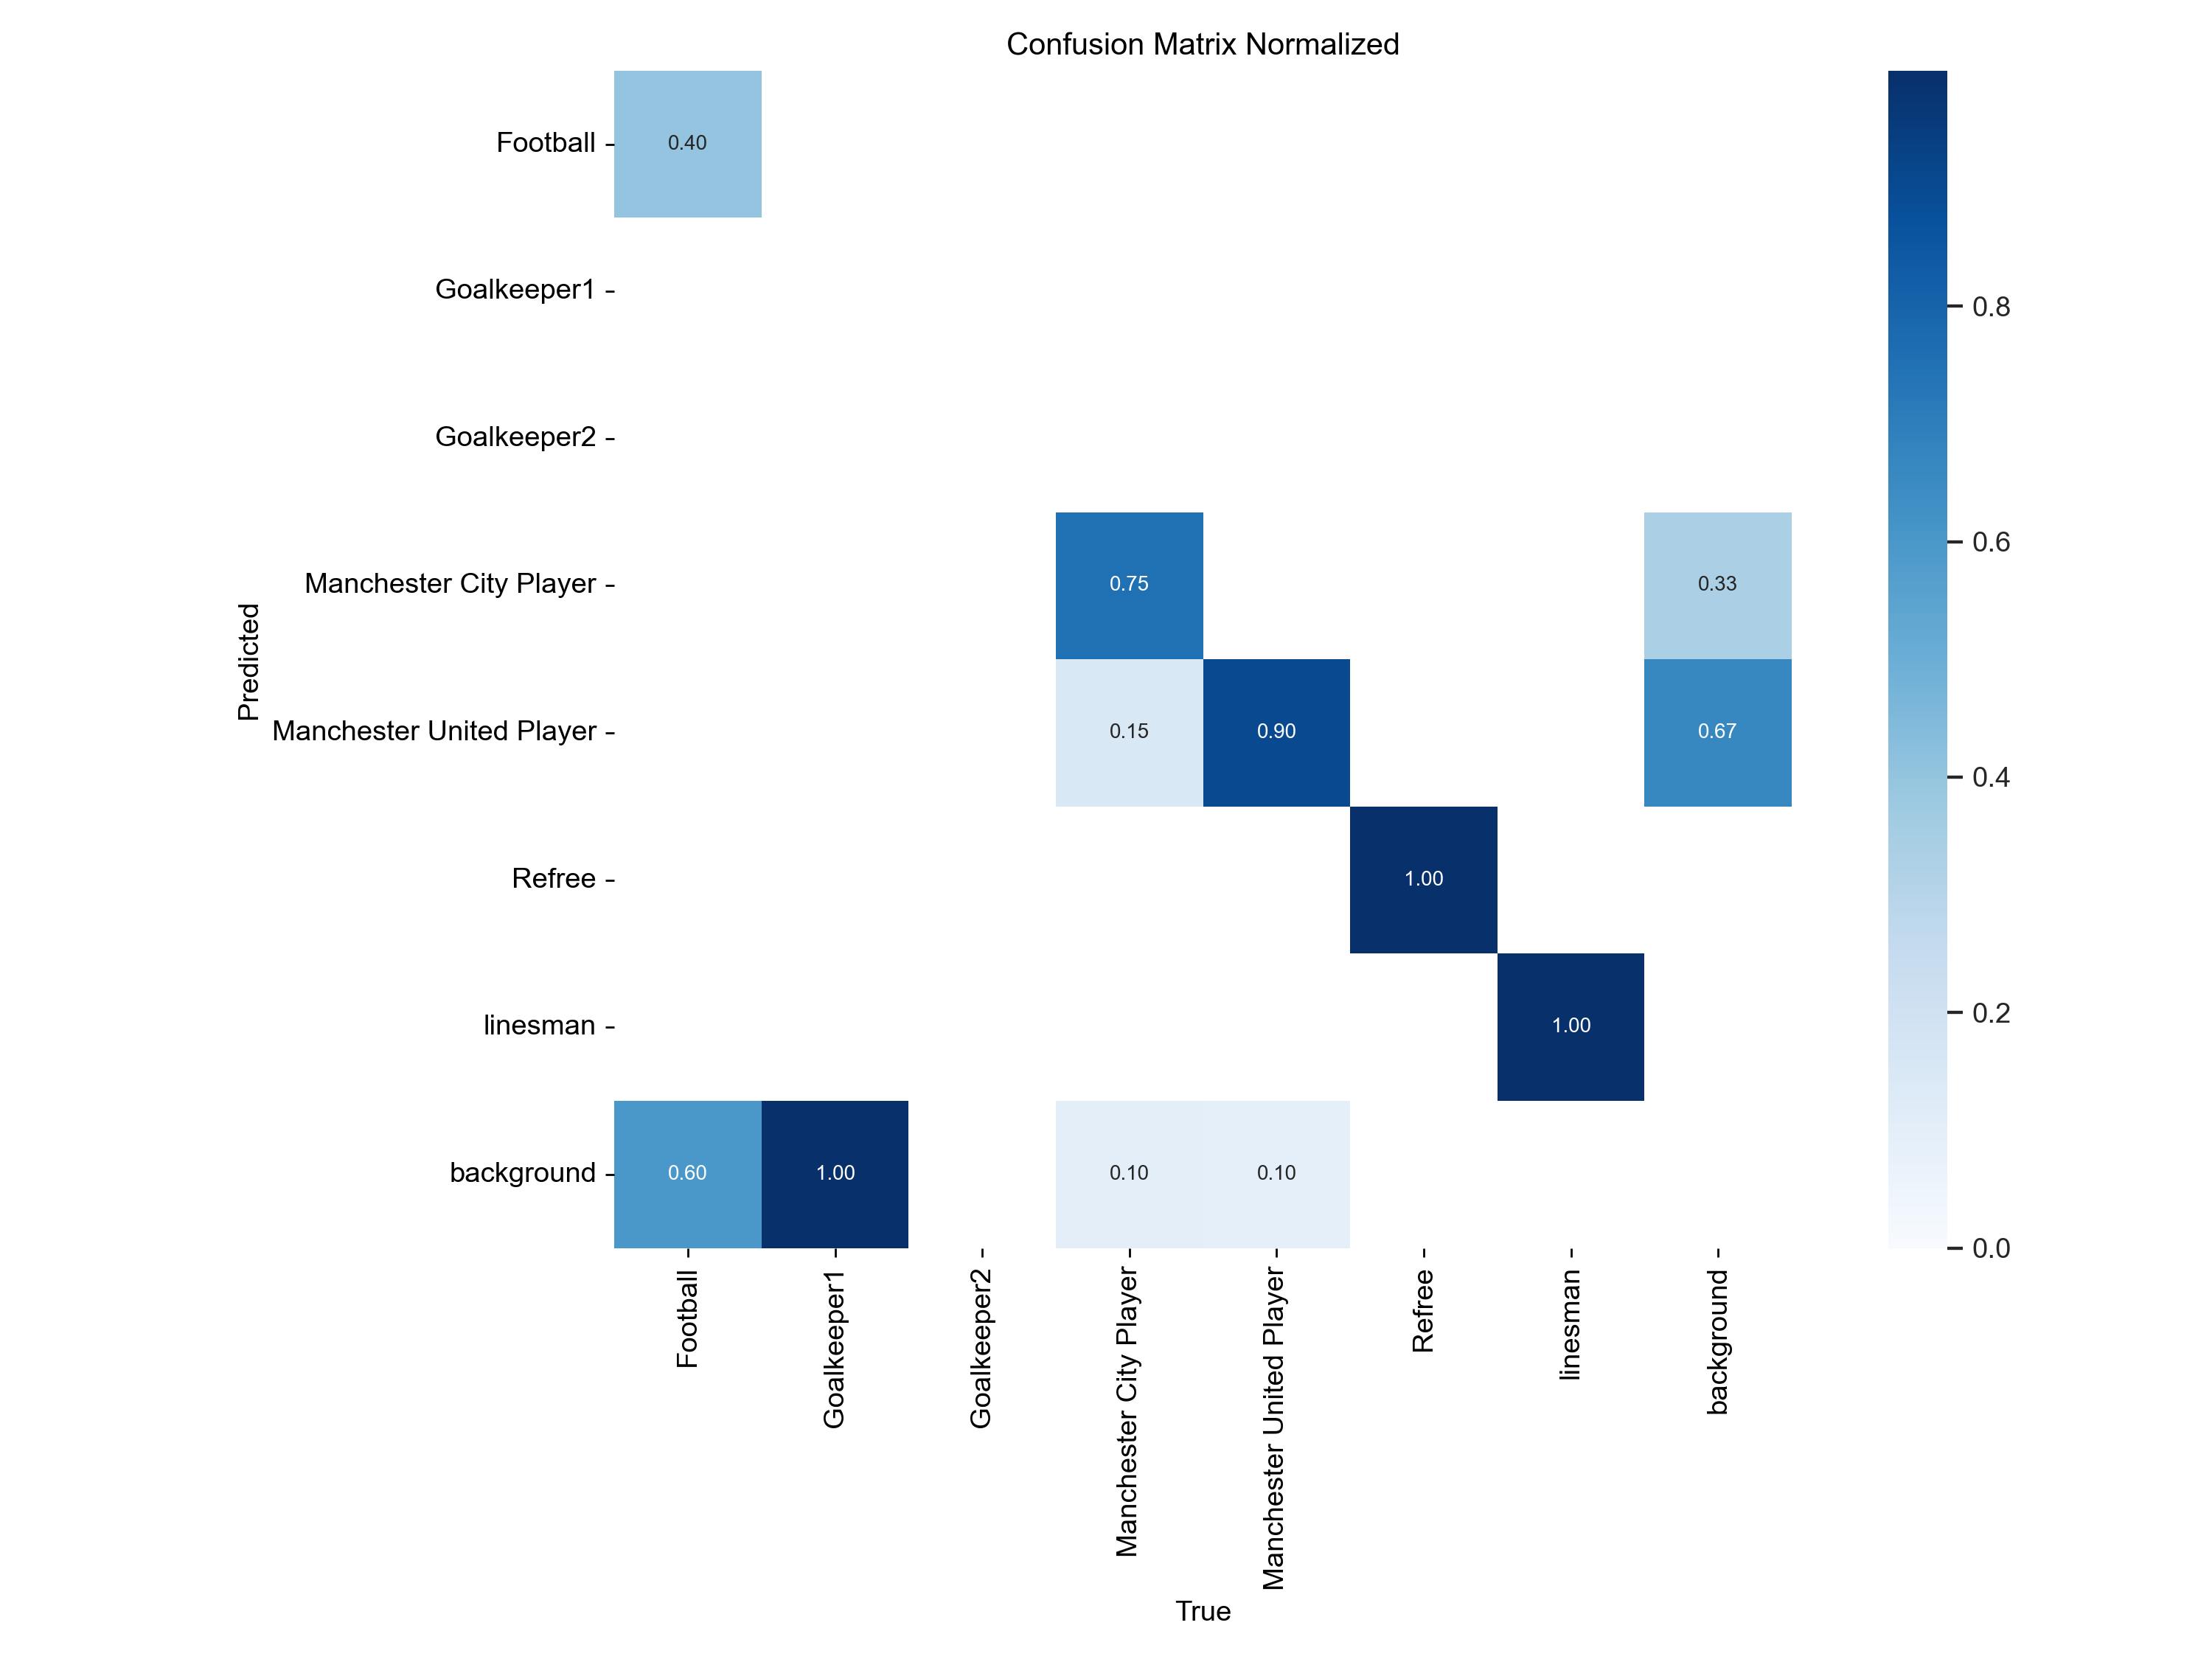

In [ ]:
Image(filename=f'/Users/shubh_home/Desktop/Python-files/runs/detect/train15/confusion_matrix_normalized.png', width=600)

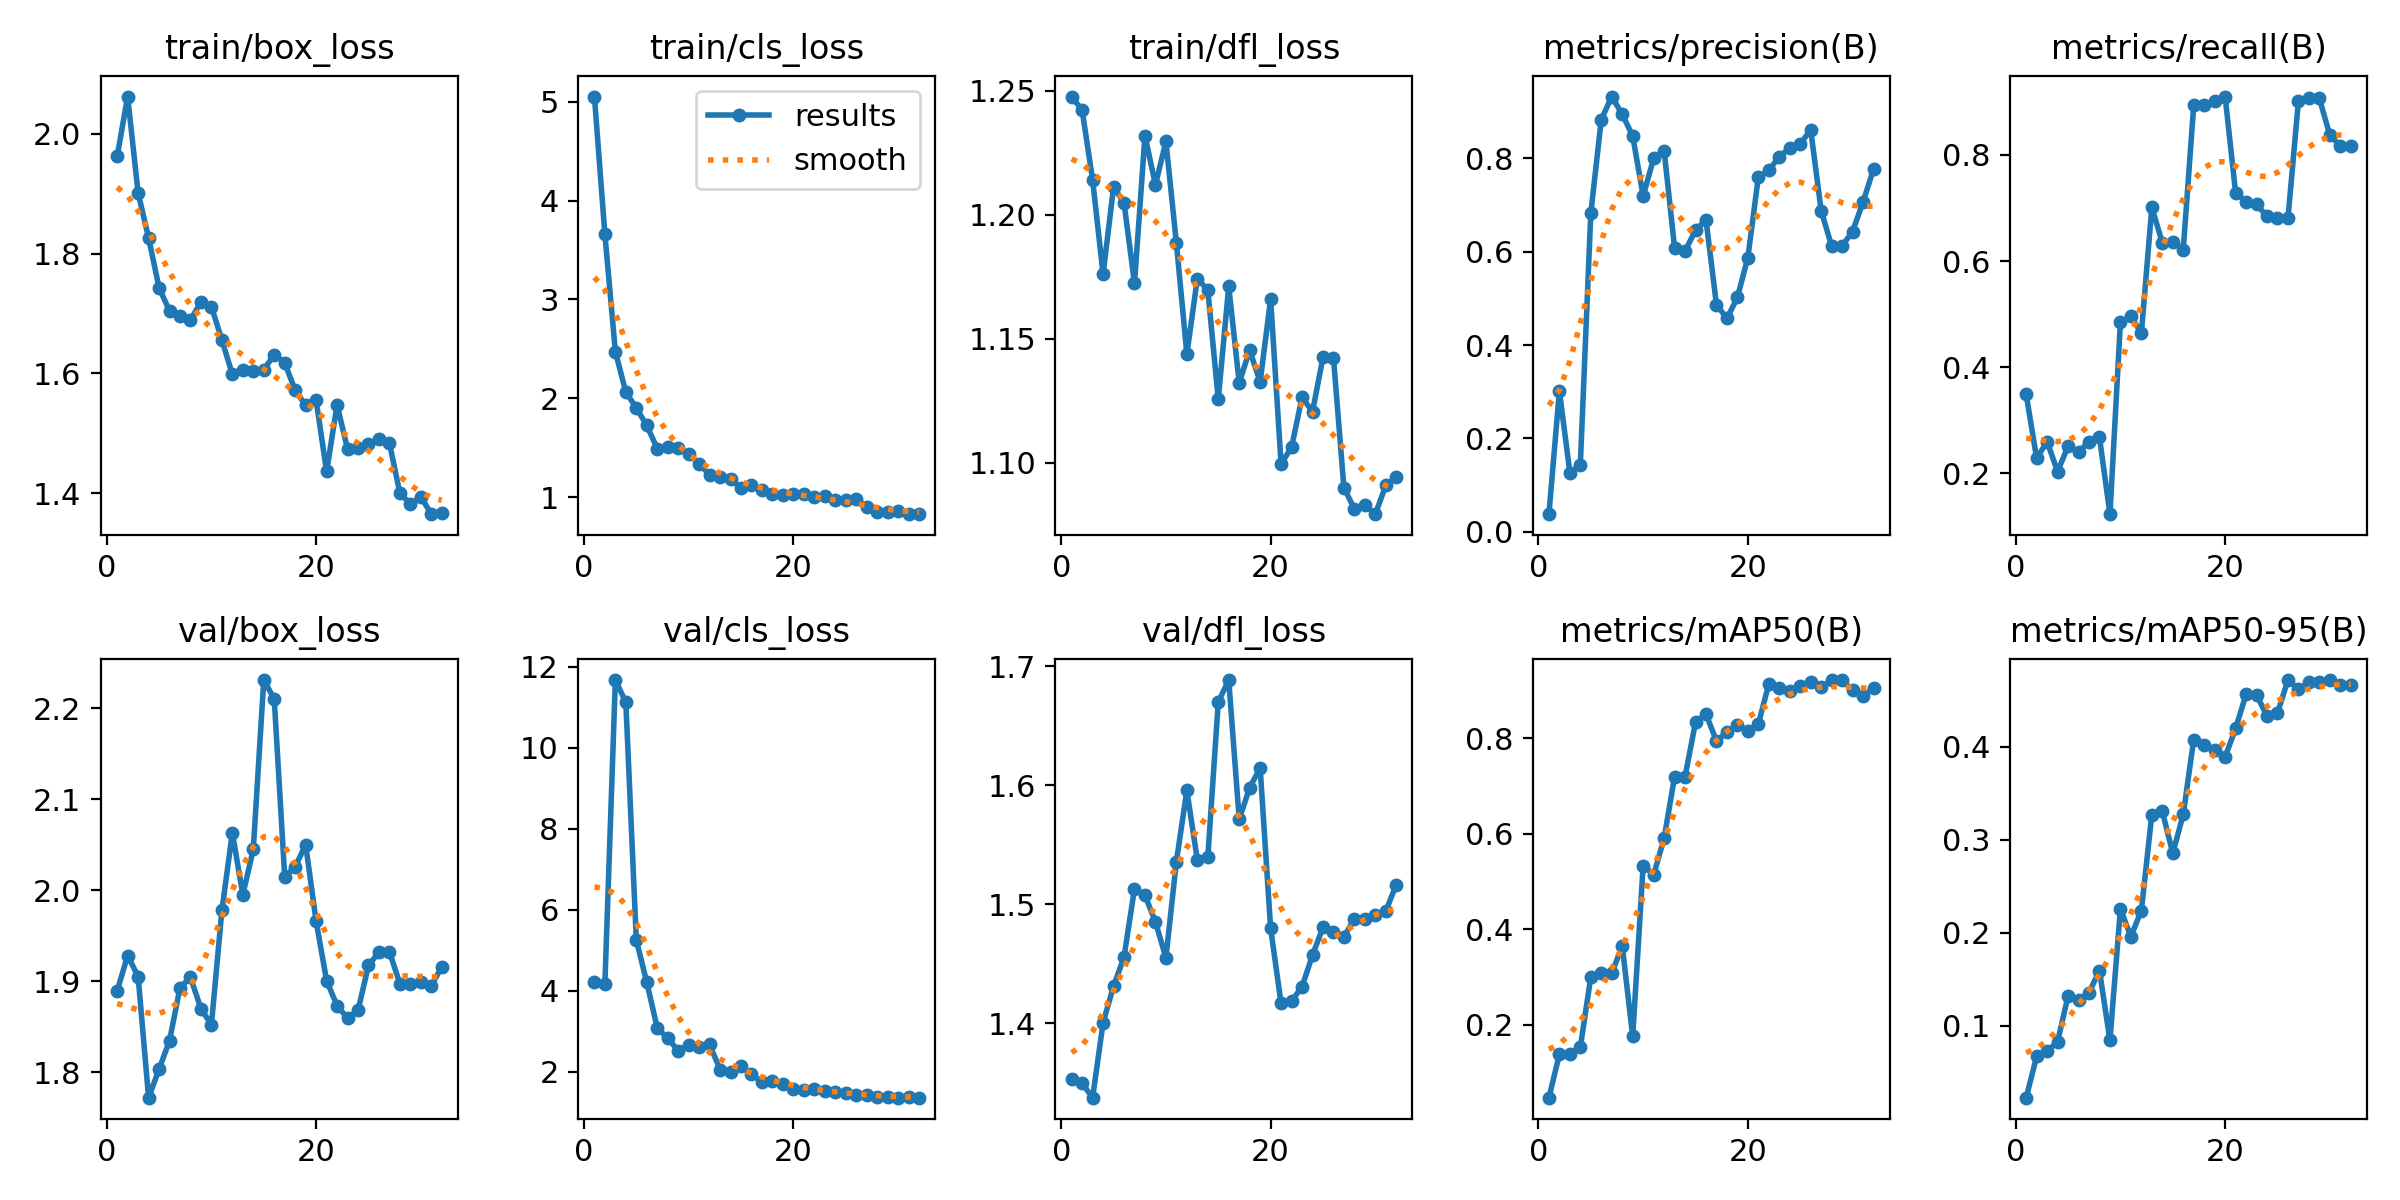

In [ ]:
Image(filename=f'/Users/shubh_home/Desktop/Python-files/runs/detect/train15/results.png', width=600)

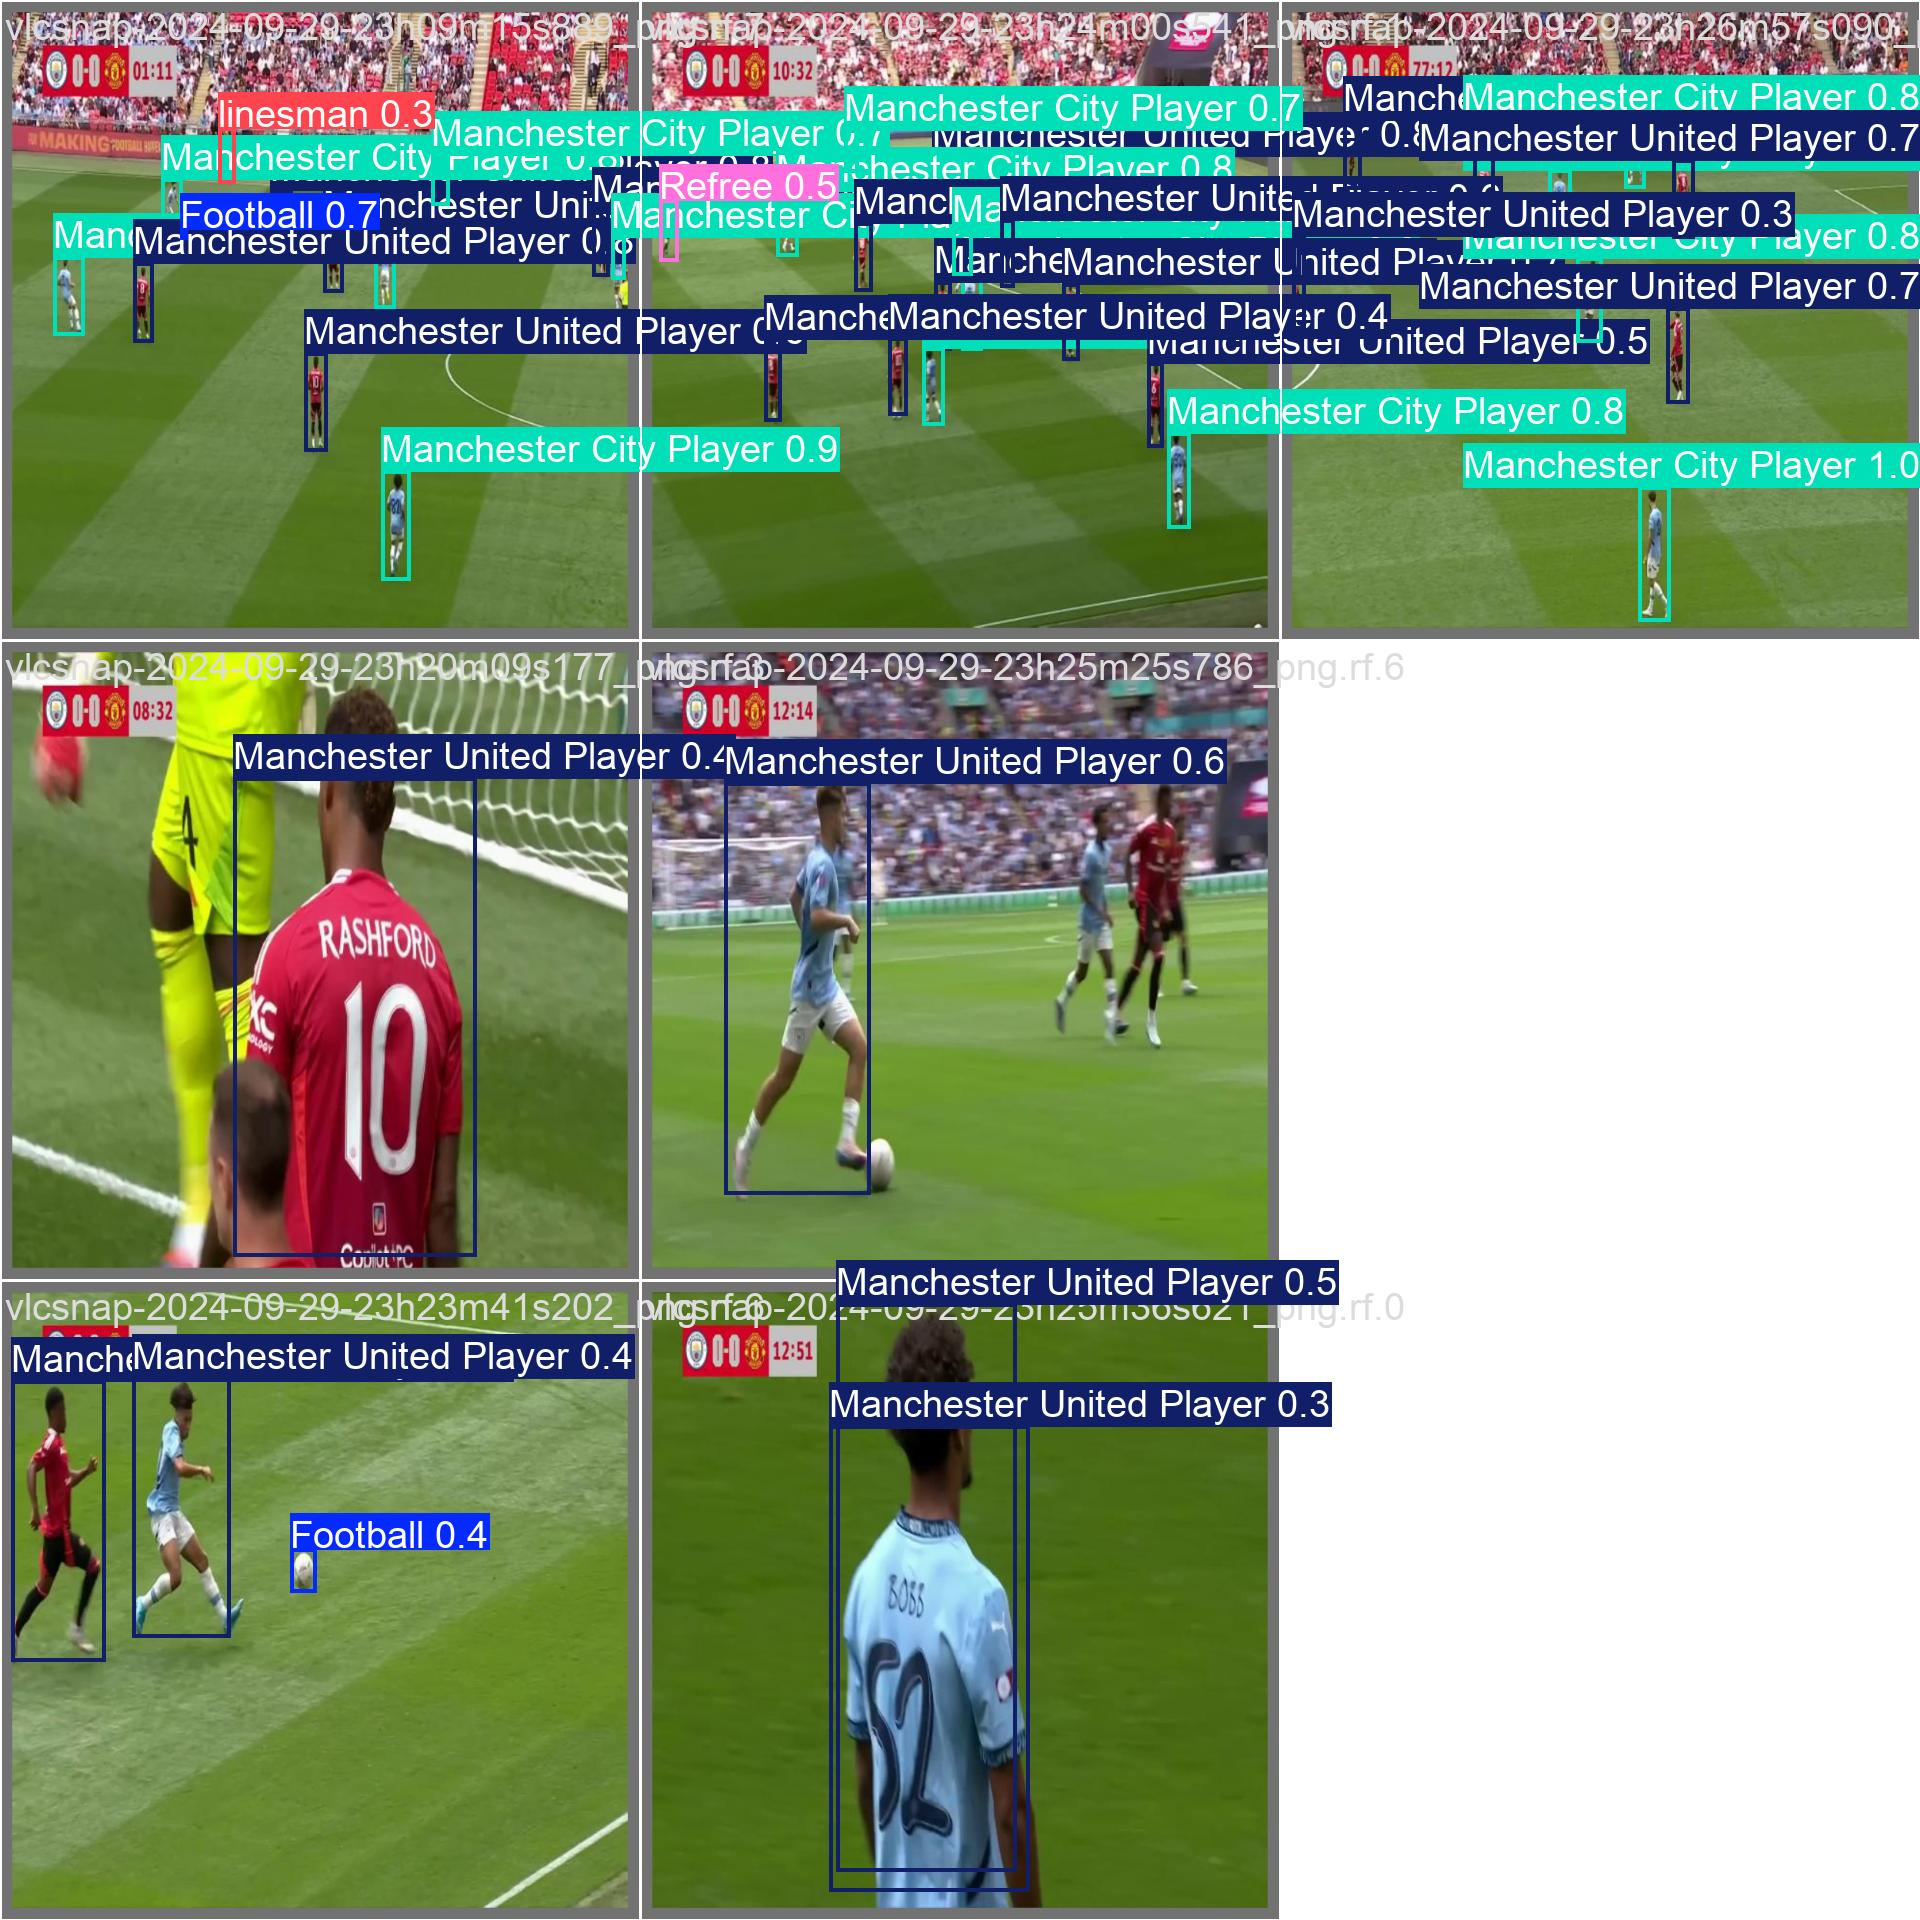

In [ ]:
Image(filename=f'/Users/shubh_home/Desktop/Python-files/runs/detect/train15/val_batch0_pred.jpg', width=600)

VALIDATE CUSTOM MODEL NOW

In [ ]:

!yolo task=detect mode=val model=/Users/shubh_home/Desktop/Python-files/runs/detect/train15/weights/best.pt data=/Users/shubh_home/Desktop/Python-files/Foot123-1/data.yaml

Ultralytics YOLOv8.2.102 🚀 Python-3.12.6 torch-2.4.1 CPU (Apple M1)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /Users/shubh_home/Desktop/Python-files/Foot123-1/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          7         49      0.862       0.68      0.917      0.472
              Football          5          5          1      0.522      0.938        0.5
           Goalkeeper1          1          1          1          0      0.995      0.318
Manchester City Player          6         20      0.908       0.75      0.807      0.439
Manchester United Player          6         21      0.718       0.81      0.775      0.279
                Refree          1          1      0.632          1      0.995      0.497
              linesman          1          1      0.913          1      0.995      0.796
Speed: 4.5ms preprocess, 267.1ms inference, 0.0ms loss, 1.8ms 

In [ ]:
!yolo task=detect mode=predict model=/Users/shubh_home/Desktop/Python-files/runs/detect/train15/weights/best.pt conf=0.25 source=/Users/shubh_home/Desktop/Python-files/Foot123-1/test/images save=True

Ultralytics YOLOv8.2.102 🚀 Python-3.12.6 torch-2.4.1 CPU (Apple M1)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/3 /Users/shubh_home/Desktop/Python-files/Foot123-1/test/images/vlcsnap-2024-09-29-23h10m30s123_png.rf.35a67ae794a4ba33ce141a8893483265.jpg: 800x800 1 Football, 3 Manchester City Players, 3 Manchester United Players, 261.0ms
image 2/3 /Users/shubh_home/Desktop/Python-files/Foot123-1/test/images/vlcsnap-2024-09-29-23h25m29s622_png.rf.ff6facb0d3ffa1148195e07ac2af5a41.jpg: 800x800 1 Football, 2 Manchester City Players, 1 Manchester United Player, 247.5ms
image 3/3 /Users/shubh_home/Desktop/Python-files/Foot123-1/test/images/vlcsnap-2024-09-29-23h25m48s184_png.rf.b5c6df2189a5cf59038e77005d1ba908.jpg: 800x800 1 Football, 1 Manchester City Player, 224.2ms
Speed: 3.4ms preprocess, 244.2ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/mo

INFERENCE WITH CUSTOM MODEL

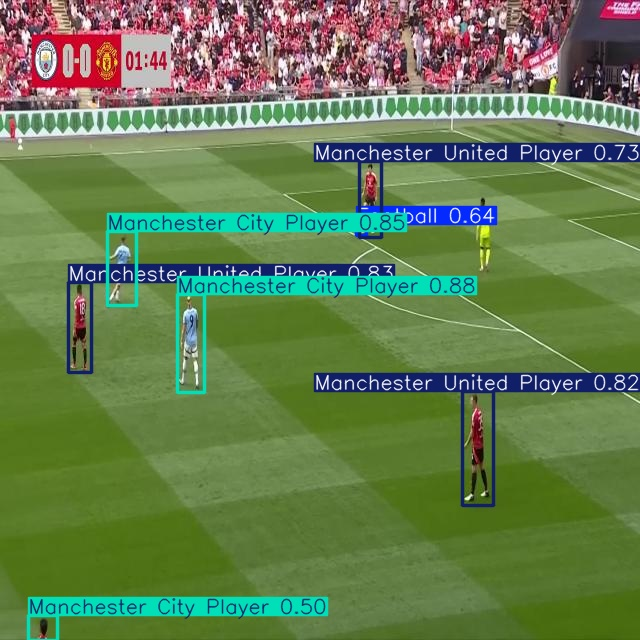

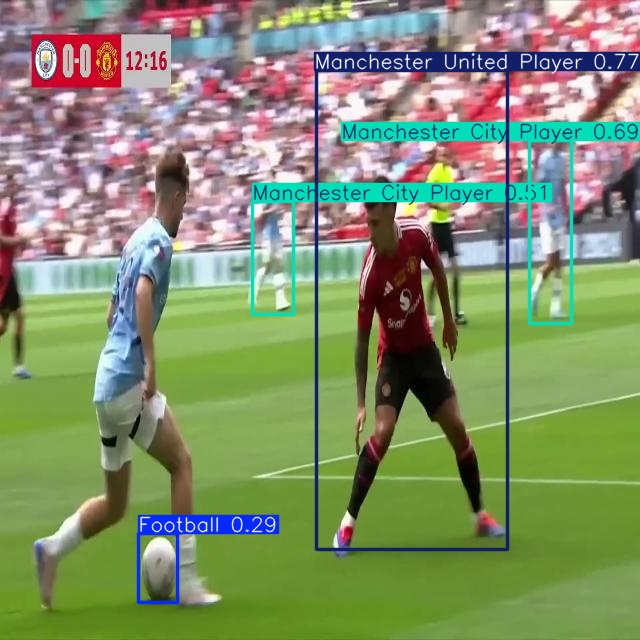

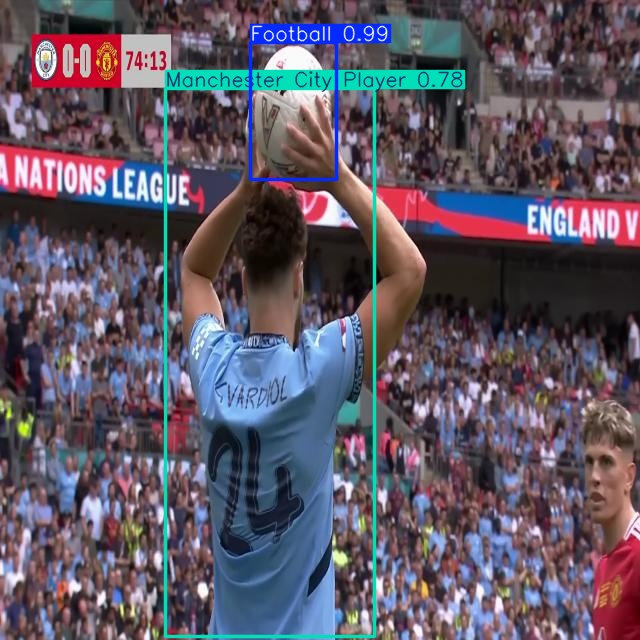

In [ ]:
import os
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/Users/shubh_home/Desktop/Python-files/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Check if any subfolders were found
if subfolders:
    # Find the latest folder by modification time
    latest_folder = max(subfolders, key=os.path.getmtime)

    # List of specific image paths (fix here)
    image_paths = [
        '/Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h10m30s123_png.rf.35a67ae794a4ba33ce141a8893483265.jpg',
        '/Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h25m29s622_png.rf.ff6facb0d3ffa1148195e07ac2af5a41.jpg',
        '/Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h25m48s184_png.rf.b5c6df2189a5cf59038e77005d1ba908.jpg'
    ][:3]

    # Display each image
    for image_path in image_paths:
        display(Image(filename=image_path, width=600))
        print("\n")
else:
    print("No subfolders starting with 'predict' were found.")


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/Users/shubh_home/Desktop/Python-files/runs/detect/train15")

Dependency ultralytics==8.0.196 is required but found version=8.2.102, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/shubhworkspace/foot123/1
Share your model with the world at: https://universe.roboflow.com/shubhworkspace/foot123/model/1


In [ ]:
# Run inference using YOLOv8 model
from ultralytics import YOLO

# Load the model
try:
    # Option 1: Load from a trained weights file
    model = YOLO('/Users/shubh_home/Desktop/Python-files/runs/detect/train15/weights/best.pt')  # adjust path to your weights file

    # Option 2: Or load a pretrained model if you're using one
    # model = YOLO('yolov8n.pt')  # or 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt'
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Choose random test image
import os
import random

# Set the correct path to your predict directory
predict_dir = '/Users/shubh_home/Desktop/Python-files/runs/detect/predict4'

# Verify the directory exists
if not os.path.exists(predict_dir):
    raise FileNotFoundError(f"Directory not found: {predict_dir}")

# Get list of image files
valid_extensions = ('.jpg', '.jpeg', '.png')
image_files = [f for f in os.listdir(predict_dir)
               if f.lower().endswith(valid_extensions)]

if not image_files:
    raise FileNotFoundError(f"No image files found in {predict_dir}")

# Choose random image
random_test_image = random.choice(image_files)
print(f"Running inference on {random_test_image}")

# Construct full path to image and run prediction
image_path = os.path.join(predict_dir, random_test_image)

# Run prediction
results = model(image_path, conf=0.49, iou=0.3)  # adjust confidence and IOU thresholds as needed

# Print results
for r in results:
    print(f"Detections: {r.boxes.data}")  # print predictions

Running inference on vlcsnap-2024-09-29-23h25m29s622_png.rf.ff6facb0d3ffa1148195e07ac2af5a41.jpg

image 1/1 /Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h25m29s622_png.rf.ff6facb0d3ffa1148195e07ac2af5a41.jpg: 800x800 1 Manchester City Player, 1 Manchester United Player, 230.0ms
Speed: 3.3ms preprocess, 230.0ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
Detections: tensor([[3.2226e+02, 1.9906e+02, 4.9561e+02, 5.3767e+02, 5.5277e-01, 4.0000e+00],
        [2.5476e+02, 2.0391e+02, 2.9207e+02, 3.1343e+02, 4.9060e-01, 3.0000e+00]])


In [ ]:
# Run inference using YOLOv8 model
from ultralytics import YOLO
import os

# Load the model
try:
    # Load from trained weights file
    model = YOLO('/Users/shubh_home/Desktop/Python-files/runs/detect/train15/weights/best.pt')  # adjust path to your weights file
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Set the correct path to your predict directory
predict_dir = '/Users/shubh_home/Desktop/Python-files/runs/detect/predict4'

# Verify the directory exists
if not os.path.exists(predict_dir):
    raise FileNotFoundError(f"Directory not found: {predict_dir}")

# Get list of image files
valid_extensions = ('.jpg', '.jpeg', '.png')
image_files = [f for f in os.listdir(predict_dir)
               if f.lower().endswith(valid_extensions)]

if not image_files:
    raise FileNotFoundError(f"No image files found in {predict_dir}")

print(f"Found {len(image_files)} images to process")

# Process each image
for image_file in image_files:
    print(f"\nProcessing image: {image_file}")

    # Construct full path to image
    image_path = os.path.join(predict_dir, image_file)

    # Run prediction
    try:
        results = model(image_path, conf=0.4, iou=0.3)  # adjust confidence and IOU thresholds as needed

        # Process results for this image
        for r in results:
            print(f"Detections in {image_file}:")
            if len(r.boxes) > 0:
                print(f"Number of detections: {len(r.boxes)}")
                for box in r.boxes:
                    # Get confidence score
                    confidence = box.conf.item()
                    # Get predicted class
                    class_id = int(box.cls.item())
                    class_name = model.names[class_id]
                    print(f"- {class_name}: {confidence:.2f}")
            else:
                print("No detections found")

    except Exception as e:
        print(f"Error processing {image_file}: {e}")
        continue

print("\nInference completed on all images")

Found 3 images to process

Processing image: vlcsnap-2024-09-29-23h10m30s123_png.rf.35a67ae794a4ba33ce141a8893483265.jpg

image 1/1 /Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h10m30s123_png.rf.35a67ae794a4ba33ce141a8893483265.jpg: 800x800 1 Manchester City Player, 3 Manchester United Players, 317.3ms
Speed: 12.4ms preprocess, 317.3ms inference, 10.7ms postprocess per image at shape (1, 3, 800, 800)
Detections in vlcsnap-2024-09-29-23h10m30s123_png.rf.35a67ae794a4ba33ce141a8893483265.jpg:
Number of detections: 4
- Manchester United Player: 0.78
- Manchester United Player: 0.68
- Manchester City Player: 0.64
- Manchester United Player: 0.45

Processing image: vlcsnap-2024-09-29-23h25m48s184_png.rf.b5c6df2189a5cf59038e77005d1ba908.jpg

image 1/1 /Users/shubh_home/Desktop/Python-files/runs/detect/predict4/vlcsnap-2024-09-29-23h25m48s184_png.rf.b5c6df2189a5cf59038e77005d1ba908.jpg: 800x800 1 Manchester City Player, 239.4ms
Speed: 2.3ms preprocess, 239.4

MAKE SURE TO DOWNLOAD THE VIDEO AS NOW, WE HAVE TO RUN INFERENCE ON THE VIDEO

In [ ]:
!yolo task=detect mode=predict model=/Users/shubh_home/Desktop/Python-files/runs/detect/train15/weights/best.pt conf=0.35 source='/Users/shubh_home/Desktop/Python-files/smal-vid.mov' save=True


/Users/shubh_home/myenv/lib/python3.12/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), 